In [1]:
import numpy as np

In [6]:
filename = "/home/nero/Projects/ros2_subscriber_ws/lidar_data/semantic_frame_0.csv"

csv_data = np.loadtxt(filename, dtype=np.float32, skiprows=0, delimiter=',')

In [7]:
csv_data

array([[-25.21998   ,   6.1096873 ,   0.90617764,   0.9982283 ,
          0.        ,   2.        ],
       [-22.542168  ,   6.639355  ,   0.820621  ,   0.7718135 ,
          0.        ,   2.        ],
       [-22.349882  ,   6.731001  ,   0.8150992 ,   0.21828733,
          0.        ,   2.        ],
       ...,
       [ -5.1968946 ,  -0.09501465,  -2.4016786 ,   0.41945124,
          0.        ,   7.        ],
       [ -5.1973634 ,  -0.06334472,  -2.4016786 ,   0.41945237,
          0.        ,   7.        ],
       [ -5.197656  ,  -0.03166992,  -2.4016786 ,   0.41945124,
          0.        ,   7.        ]], dtype=float32)

In [9]:
import pandas as pd

In [10]:
columns = ['x', 'y', 'z', 'CosAngle', 'ObjIdx', 'ObjTag']

df = pd.DataFrame(csv_data, columns=columns)

In [11]:
df.head()

,x,y,z,CosAngle,ObjIdx,ObjTag
0,-25.219980,6.109687,0.906178,0.998228,0.0,2.0
1,-22.542168,6.639355,0.820621,0.771814,0.0,2.0
2,-22.349882,6.731001,0.815099,0.218287,0.0,2.0
3,-22.027792,6.780708,0.804846,0.221068,0.0,2.0
4,-21.713867,6.829214,0.794880,0.223840,0.0,2.0


In [12]:
df['ObjIdx'].unique()


array([  0., 416., 415., 430., 413., 414., 417., 418., 439., 442., 580.],
      dtype=float32)

In [13]:
df['ObjTag'].unique()


array([ 2.,  5., 18.,  9.,  0.,  1., 20., 19., 12., 11., 10.,  8.,  7.,
       17.,  4.], dtype=float32)

In [14]:
actors_id = df['ObjIdx'].unique()

In [16]:
df[df['ObjIdx'] == 416].head()

,x,y,z,CosAngle,ObjIdx,ObjTag
40,10.771953,9.965899,0.512462,0.988268,416.0,5.0
41,10.928320,9.987656,0.516996,0.859265,416.0,18.0
42,10.955742,9.890864,0.515432,0.501227,416.0,18.0
43,11.121679,9.918286,0.520384,0.584987,416.0,18.0
593,10.771953,9.965899,0.403398,0.988497,416.0,5.0


In [18]:
for a_id in actors_id:
    filename = f"csv/actor_ObjIdx_{a_id}.csv"
    df_a = df[df['ObjIdx'] == a_id]
    df_a.to_csv(filename, index=False)

In [27]:
points = df[df['ObjIdx'] == 580].to_numpy()

points

array([[ 4.0519919e+00,  4.0335202e+00, -5.2351183e-01,  4.4092840e-01,
         5.8000000e+02,  4.0000000e+00],
       [ 4.0654688e+00,  3.9979150e+00, -5.2209729e-01,  5.5970711e-01,
         5.8000000e+02,  4.0000000e+00],
       [ 4.0916405e+00,  3.9749315e+00, -5.2234268e-01,  5.3918779e-01,
         5.8000000e+02,  4.0000000e+00],
       ...,
       [ 3.9535546e+00,  3.8407762e+00, -2.3509023e+00,  9.1341007e-01,
         5.8000000e+02,  4.0000000e+00],
       [ 3.9863281e+00,  3.8256640e+00, -2.3564758e+00,  7.6862937e-01,
         5.8000000e+02,  4.0000000e+00],
       [ 4.0381250e+00,  3.8283985e+00, -2.3732762e+00,  3.3448589e-01,
         5.8000000e+02,  4.0000000e+00]], dtype=float32)

In [28]:
points.shape

(536, 6)

In [33]:
points_xy = points[:, :2]

In [34]:
points_xy.shape

(536, 2)

In [52]:
# Rotating an Object Around the Origin


import numpy as np

def rotateMatrix(a):
    return np.array([[np.cos(a), -np.sin(a)], [np.sin(a), np.cos(a)]])
    
angle_in_degrees = 180
angle_in_rads = np.deg2rad(angle_in_degrees)
new_points_xy = points_xy @ rotateMatrix(angle_in_rads).T

In [39]:
new_points_xy.shape

(536, 2)

In [44]:
new_points_xy

array([[0.01306148, 5.71732048],
       [0.04776772, 5.70167338],
       [0.08252572, 5.70392773],
       ...,
       [0.07974639, 5.51142419],
       [0.11360666, 5.52391264],
       [0.14829908, 5.56247211]])

In [53]:
complete_new_points = np.concatenate((new_points_xy, points[:, 2:]), axis=1)

In [42]:
complete_new_points

array([[ 1.30614769e-02,  5.71732048e+00, -5.23511827e-01,
         4.40928400e-01,  5.80000000e+02,  4.00000000e+00],
       [ 4.77677208e-02,  5.70167338e+00, -5.22097290e-01,
         5.59707105e-01,  5.80000000e+02,  4.00000000e+00],
       [ 8.25257210e-02,  5.70392773e+00, -5.22342682e-01,
         5.39187789e-01,  5.80000000e+02,  4.00000000e+00],
       ...,
       [ 7.97463892e-02,  5.51142419e+00, -2.35090232e+00,
         9.13410068e-01,  5.80000000e+02,  4.00000000e+00],
       [ 1.13606662e-01,  5.52391264e+00, -2.35647583e+00,
         7.68629372e-01,  5.80000000e+02,  4.00000000e+00],
       [ 1.48299081e-01,  5.56247211e+00, -2.37327623e+00,
         3.34485888e-01,  5.80000000e+02,  4.00000000e+00]])

In [43]:
complete_new_points.shape

(536, 6)

In [45]:
new_points_xy[0]

array([0.01306148, 5.71732048])

In [46]:
complete_new_points[0]

array([ 1.30614769e-02,  5.71732048e+00, -5.23511827e-01,  4.40928400e-01,
        5.80000000e+02,  4.00000000e+00])

In [54]:
columns = ['x', 'y', 'z', 'CosAngle', 'ObjIdx', 'ObjTag']
df_new = pd.DataFrame(complete_new_points, columns=columns)

df_new.to_csv("rotated_person_180_anticlockwise.csv", index=False)

### Above code rotates in ANTICLOCKWISE

## Understandin ray casting algorithm

In [55]:
!pip install scipy

  Using cached scipy-1.10.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.5 MB)


In [56]:
import numpy as np
from scipy.spatial import ConvexHull

def point_in_point_cloud(point, point_cloud):
    # Check if the point is inside the convex hull of the point cloud using ray casting

    # Compute the convex hull of the point cloud
    hull = ConvexHull(point_cloud)

    # Check if the point is inside the convex hull
    count = 0
    for simplex in hull.simplices:
        a, b = point_cloud[simplex]
        if ((a[1] > point[1]) != (b[1] > point[1])) and \
           (point[0] < (b[0] - a[0]) * (point[1] - a[1]) / (b[1] - a[1]) + a[0]):
            count += 1

    return count % 2 == 1

# Example usage:
if __name__ == "__main__":
    # Example point cloud
    point_cloud = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])

    # Test points
    test_point_inside = np.array([0.5, 0.5])
    test_point_outside = np.array([2, 2])

    # Check if the points are inside the point cloud
    result_inside = point_in_point_cloud(test_point_inside, point_cloud)
    result_outside = point_in_point_cloud(test_point_outside, point_cloud)

    print(f"Test Point Inside: {result_inside}")
    print(f"Test Point Outside: {result_outside}")


Test Point Inside: True
Test Point Outside: False


In [58]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.2/157.2 kB 3.3 MB/s eta 0:00:000:00:01
  Using cached Pillow-10.1.0-cp38-cp38-manylinux_2_28_x86_64.whl.metadata (9.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 10.2 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.1/301.1 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 10.1 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.6 MB/s eta 0:00:000m eta 0:00:010:00:01
Using cached Pillow-10.1.0-cp38-cp38-manylinux_2_28_x86_64.whl (3.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 6.7 MB/s eta 0:00:00


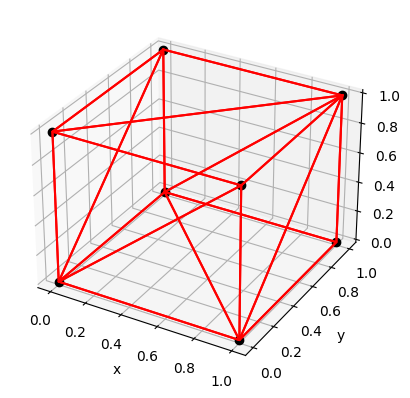

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import ConvexHull


# 8 points defining the cube corners
pts = np.array([[0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0],
                [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1], ])

hull = ConvexHull(pts)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Plot defining corner points
ax.plot(pts.T[0], pts.T[1], pts.T[2], "ko")

# 12 = 2 * 6 faces are the simplices (2 simplices per square face)
for s in hull.simplices:
    s = np.append(s, s[0])  # Here we cycle back to the first coordinate
    ax.plot(pts[s, 0], pts[s, 1], pts[s, 2], "r-")

# Make axis label
for i in ["x", "y", "z"]:
    eval("ax.set_{:s}label('{:s}')".format(i, i))

plt.show()


In [61]:
complete_new_points.shape

(536, 6)

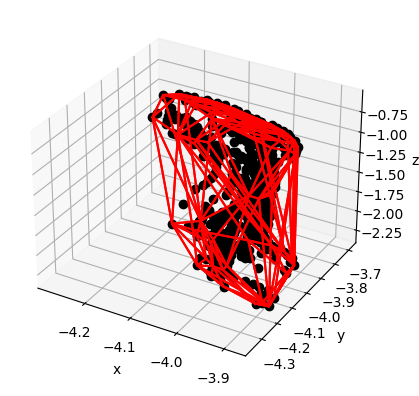

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import ConvexHull


pts = complete_new_points[:, :3]

hull = ConvexHull(pts)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Plot defining corner points
ax.plot(pts.T[0], pts.T[1], pts.T[2], "ko")

# 12 = 2 * 6 faces are the simplices (2 simplices per square face)
for s in hull.simplices:
    s = np.append(s, s[0])  # Here we cycle back to the first coordinate
    ax.plot(pts[s, 0], pts[s, 1], pts[s, 2], "r-")

# Make axis label
for i in ["x", "y", "z"]:
    eval("ax.set_{:s}label('{:s}')".format(i, i))

plt.show()


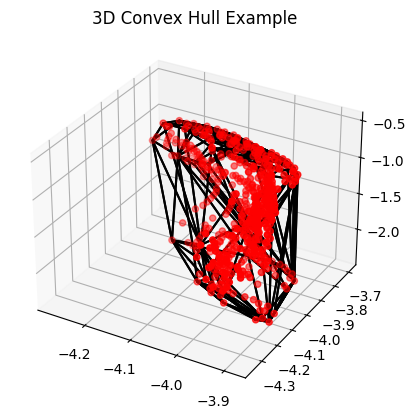

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import ConvexHull

# Generate random 3D points
np.random.seed(0)
points_3d = complete_new_points[:, :3]

# Compute 3D convex hull
hull_3d = ConvexHull(points_3d)

# Plot the 3D points and convex hull
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot points
ax.scatter(points_3d[:, 0], points_3d[:, 1], points_3d[:, 2], c='r', marker='o')

# Plot convex hull
for simplex in hull_3d.simplices:
    simplex = np.append(simplex, simplex[0])  # Close the loop
    ax.plot(points_3d[simplex, 0], points_3d[simplex, 1], points_3d[simplex, 2], 'k-')

ax.set_title('3D Convex Hull Example')
plt.show()


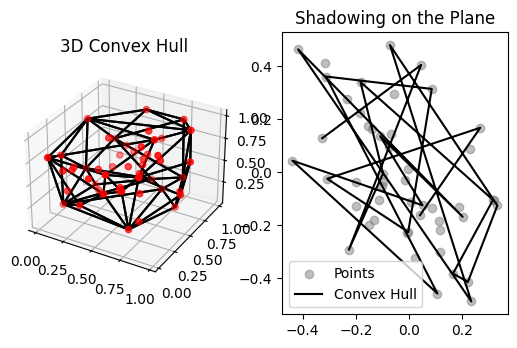

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import ConvexHull

def generate_points_3d(num_points=50):
    np.random.seed(0)
    return np.random.rand(num_points, 3)

def project_onto_plane(points, plane_normal):
    # Project points onto a plane defined by its normal vector
    normalized_normal = plane_normal / np.linalg.norm(plane_normal)
    projection_matrix = np.eye(3) - np.outer(normalized_normal, normalized_normal)
    return points.dot(projection_matrix)

def visualize_shadowing(light_direction):
    # Generate points and compute convex hull
    points_3d = generate_points_3d()
    hull_3d = ConvexHull(points_3d)

    # Project points and convex hull onto a plane perpendicular to the light direction
    projected_points = project_onto_plane(points_3d, light_direction)
    projected_hull_vertices = project_onto_plane(hull_3d.points[hull_3d.vertices], light_direction)

    # Plot the original 3D convex hull
    fig = plt.figure()
    ax = fig.add_subplot(121, projection='3d')
    ax.scatter(points_3d[:, 0], points_3d[:, 1], points_3d[:, 2], c='r', marker='o')
    for simplex in hull_3d.simplices:
        simplex = np.append(simplex, simplex[0])  # Close the loop
        ax.plot(points_3d[simplex, 0], points_3d[simplex, 1], points_3d[simplex, 2], 'k-')
    ax.set_title('3D Convex Hull')

    # Plot the shadowing on the plane
    ax = fig.add_subplot(122)
    ax.scatter(projected_points[:, 0], projected_points[:, 1], c='gray', marker='o', alpha=0.5, label='Points')
    ax.plot(projected_hull_vertices[:, 0], projected_hull_vertices[:, 1], 'k-', label='Convex Hull')
    ax.set_aspect('equal', 'box')
    ax.set_title('Shadowing on the Plane')
    plt.legend()
    plt.show()

# Set the direction of the light source
light_direction = np.array([1, 1, 1])

# Visualize shadowing by the convex hull
visualize_shadowing(light_direction)


In [72]:
import open3d as o3d

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [73]:
rays = o3d.t.geometry.RaycastingScene.create_rays_pinhole(
    fov_deg=90,
    center=[0, 0, 2],
    eye=[2, 3, 0],
    up=[0, 1, 0],
    width_px=640,
    height_px=480,
)

In [74]:
rays.shape

SizeVector[480, 640, 6]

In [75]:
# import open3d as o3d
# import numpy as np

# def create_ray(origin, direction, length=1.0):
#     """
#     Create a line (ray) in 3D space.

#     Parameters:
#     - origin: Starting point of the ray (3D coordinates).
#     - direction: Direction of the ray (normalized 3D vector).
#     - length: Length of the ray.

#     Returns:
#     - ray_points: Array containing the points along the ray.
#     """
#     t = np.linspace(0, length, 100)
#     ray_points = origin + t[:, np.newaxis] * direction
#     return ray_points

# # Set up visualization window
# vis = o3d.visualization.Visualizer()
# vis.create_window()

# # Create a simple point cloud
# points = np.array([[0.0, 0.0, 0.0],
#                    [1.0, 0.0, 0.0],
#                    [0.0, 1.0, 0.0],
#                    [0.0, 0.0, 1.0]])
# cloud = o3d.geometry.PointCloud()
# cloud.points = o3d.utility.Vector3dVector(points)

# # Set up ray parameters
# ray_origin = np.array([0.5, 0.5, 0.5])
# ray_direction = np.array([1.0, 1.0, 1.0])
# ray_direction /= np.linalg.norm(ray_direction)
# ray_length = 2.0

# # Create ray points
# ray_points = create_ray(ray_origin, ray_direction, ray_length)

# # Visualize the point cloud and ray
# vis.add_geometry(cloud)
# line_set = o3d.geometry.LineSet()
# line_set.points = o3d.utility.Vector3dVector(ray_points)
# lines = [[i, i + 1] for i in range(len(ray_points) - 1)]
# line_set.lines = o3d.utility.Vector2iVector(lines)
# line_set.colors = o3d.utility.Vector3dVector(np.ones_like(ray_points) * [1.0, 0.0, 0.0])  # Red color for the ray
# vis.add_geometry(line_set)

# # Render and visualize
# vis.run()
# vis.destroy_window()


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


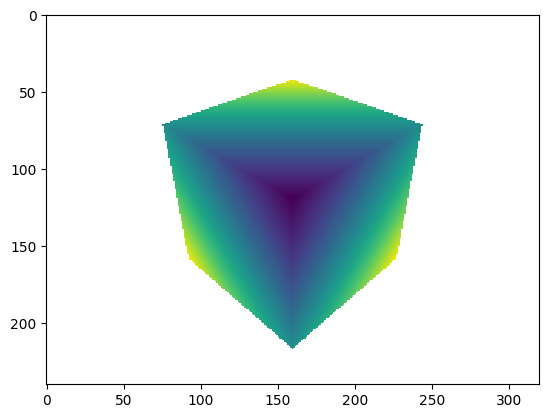

In [1]:
import open3d as o3d
import matplotlib.pyplot as plt

cube = o3d.t.geometry.TriangleMesh.from_legacy(
                                    o3d.geometry.TriangleMesh.create_box())

# Create scene and add the cube mesh
scene = o3d.t.geometry.RaycastingScene()
scene.add_triangles(cube)

# Rays are 6D vectors with origin and ray direction.
# Here we use a helper function to create rays for a pinhole camera.
rays = scene.create_rays_pinhole(fov_deg=60,
                                 center=[0.5,0.5,0.5],
                                 eye=[-1,-1,-1],
                                 up=[0,0,1],
                                 width_px=320,
                                 height_px=240)

# Compute the ray intersections.
ans = scene.cast_rays(rays)

# Visualize the hit distance (depth)
plt.imshow(ans['t_hit'].numpy())

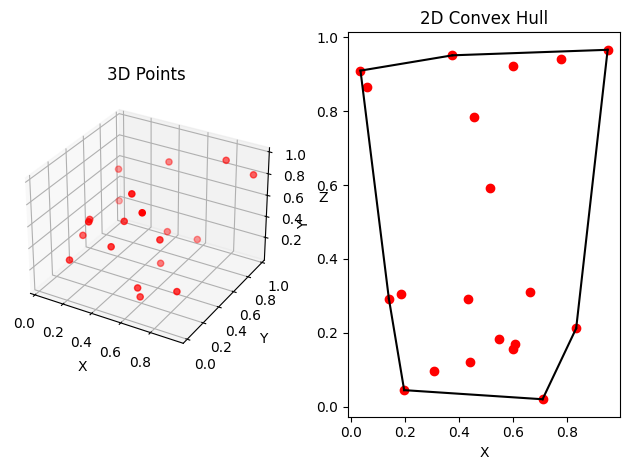

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

# Create a random 3D point cloud
np.random.seed(42)
points = np.random.rand(20, 3)

# Project points onto the XY plane
projected_points = points[:, :2]

# Find the convex hull of the projected points
hull = ConvexHull(projected_points)

# Plot the 3D points
fig = plt.figure()
ax_3d = fig.add_subplot(121, projection='3d')
ax_3d.scatter(points[:, 0], points[:, 1], points[:, 2], c='r', marker='o', label='Data Points')
ax_3d.set_xlabel('X')
ax_3d.set_ylabel('Y')
ax_3d.set_zlabel('Z')
ax_3d.set_title('3D Points')

# Plot the 2D convex hull
ax_2d = fig.add_subplot(122)
ax_2d.scatter(projected_points[:, 0], projected_points[:, 1], c='r', marker='o', label='Data Points')

for simplex in hull.simplices:
    ax_2d.plot(projected_points[simplex, 0], projected_points[simplex, 1], 'k-')

ax_2d.set_xlabel('X')
ax_2d.set_ylabel('Y')
ax_2d.set_title('2D Convex Hull')

plt.tight_layout()
plt.show()


## Experimenting with open3d for raycasting

In [12]:
import open3d as o3d
import numpy as np


filename = "/home/nero/Documents/merged cloud person with out shadow.ply"
point_cloud = o3d.io.read_point_cloud(filename)


# Visualize the point cloud
o3d.visualization.draw_geometries([point_cloud], window_name="Point Cloud Visualization")


In [14]:
# Load mesh and convert to open3d.t.geometry.TriangleMesh
cube = o3d.geometry.TriangleMesh.create_box().translate([0, 0, 0])
cube = o3d.t.geometry.TriangleMesh.from_legacy(cube)

# Create a scene and add the triangle mesh
scene = o3d.t.geometry.RaycastingScene()
cube_id = scene.add_triangles(cube)



In [15]:
rays = o3d.core.Tensor([[0.5, 0.5, 10, 0, 0, -1], [-1, -1, -1, 0, 0, -1]],
                       dtype=o3d.core.Dtype.Float32)

ans = scene.cast_rays(rays)

In [16]:
print(ans.keys())



dict_keys(['primitive_uvs', 'primitive_ids', 'geometry_ids', 'primitive_normals', 't_hit'])


In [17]:
ans

{'primitive_uvs': [[-0 0.49999997],
  [0 0]]
 Tensor[shape={2, 2}, stride={2, 1}, Float32, CPU:0, 0x3c021f0],
 'primitive_ids': [8 4294967295]
 Tensor[shape={2}, stride={1}, UInt32, CPU:0, 0x3854be0],
 'geometry_ids': [0 4294967295]
 Tensor[shape={2}, stride={1}, UInt32, CPU:0, 0x97e7b40],
 'primitive_normals': [[0 0 1],
  [0 0 0]]
 Tensor[shape={2, 3}, stride={3, 1}, Float32, CPU:0, 0x529f840],
 't_hit': [8.999999 inf]
 Tensor[shape={2}, stride={1}, Float32, CPU:0, 0x550a050]}

In [18]:
scene.INVALID_ID

4294967295

In [19]:
# Create meshes and convert to open3d.t.geometry.TriangleMesh
cube = o3d.geometry.TriangleMesh.create_box().translate([0, 0, 0])
cube = o3d.t.geometry.TriangleMesh.from_legacy(cube)
torus = o3d.geometry.TriangleMesh.create_torus().translate([0, 0, 2])
torus = o3d.t.geometry.TriangleMesh.from_legacy(torus)
sphere = o3d.geometry.TriangleMesh.create_sphere(radius=0.5).translate(
    [1, 2, 3])
sphere = o3d.t.geometry.TriangleMesh.from_legacy(sphere)

scene = o3d.t.geometry.RaycastingScene()
scene.add_triangles(cube)
scene.add_triangles(torus)
_ = scene.add_triangles(sphere)

In [20]:
rays = o3d.t.geometry.RaycastingScene.create_rays_pinhole(
    fov_deg=90,
    center=[0, 0, 2],
    eye=[2, 3, 0],
    up=[0, 1, 0],
    width_px=640,
    height_px=480,
)
# We can directly pass the rays tensor to the cast_rays function.
ans = scene.cast_rays(rays)



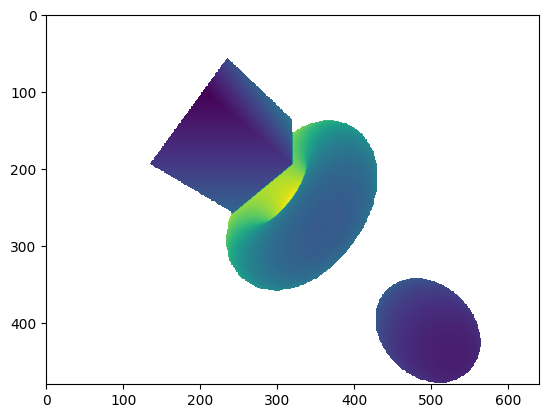

In [21]:
import matplotlib.pyplot as plt
plt.imshow(ans['t_hit'].numpy())

In [26]:
print("Convert mesh to a point cloud and estimate dimensions")
armadillo = o3d.data.ArmadilloMesh()
mesh = o3d.io.read_triangle_mesh(armadillo.path)
# Tensor TriangleMesh not supported this function yet.
mesh.compute_vertex_normals()

pcd = mesh.sample_points_poisson_disk(5000)
diameter = np.linalg.norm(
    np.asarray(pcd.get_max_bound()) - np.asarray(pcd.get_min_bound()))
o3d.visualization.draw_geometries([pcd])

print("Define parameters used for hidden_point_removal")
camera = o3d.core.Tensor([0, 0, diameter], o3d.core.float32)
radius = diameter * 100

print("Get all points that are visible from given view point")
pcd = o3d.t.geometry.PointCloud.from_legacy(pcd)
_, pt_map = pcd.hidden_point_removal(camera, radius)
pcd = pcd.select_by_index(pt_map)

print("Visualize result")
o3d.visualization.draw_geometries([pcd.to_legacy()])

Convert mesh to a point cloud and estimate dimensions
[Open3D INFO] Downloading https://github.com/isl-org/open3d_downloads/releases/download/20220201-data/ArmadilloMesh.ply
[Open3D INFO] Downloaded to /home/nero/open3d_data/download/ArmadilloMesh/ArmadilloMesh.ply
Define parameters used for hidden_point_removal
Get all points that are visible from given view point
Visualize result


In [35]:
import open3d as o3d

filename = "/home/nero/Documents/multiple person in the cloud.ply"
point_cloud = o3d.io.read_point_cloud(filename)



print("Convert mesh to a point cloud and estimate dimensions")
# armadillo = o3d.data.ArmadilloMesh()
# mesh = o3d.io.read_triangle_mesh(armadillo.path)
# # Tensor TriangleMesh not supported this function yet.
# mesh.compute_vertex_normals()

pcd = point_cloud
diameter = np.linalg.norm(
    np.asarray(pcd.get_max_bound()) - np.asarray(pcd.get_min_bound()))
o3d.visualization.draw_geometries([pcd])

print("Define parameters used for hidden_point_removal")
camera = o3d.core.Tensor([0, 0, 0], o3d.core.float32)
radius = diameter * 300

print("Get all points that are visible from given view point")
pcd = o3d.t.geometry.PointCloud.from_legacy(pcd)
_, pt_map = pcd.hidden_point_removal(camera, radius)
pcd = pcd.select_by_index(pt_map)

print("Visualize result")
o3d.visualization.draw_geometries([pcd.to_legacy()])

Convert mesh to a point cloud and estimate dimensions
Define parameters used for hidden_point_removal
Get all points that are visible from given view point
Visualize result


In [27]:
type(pcd)

open3d.cuda.pybind.t.geometry.PointCloud

In [28]:
type(point_cloud)

open3d.cuda.pybind.geometry.PointCloud